<a href="https://colab.research.google.com/github/Khadija-Zafar/codsoft_taskno.3/blob/main/Task3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Logistic Regression:
              precision    recall  f1-score   support

           0       0.83      0.96      0.89      2416
           1       0.54      0.20      0.29       584

    accuracy                           0.81      3000
   macro avg       0.69      0.58      0.59      3000
weighted avg       0.78      0.81      0.77      3000

Accuracy: 0.8113333333333334


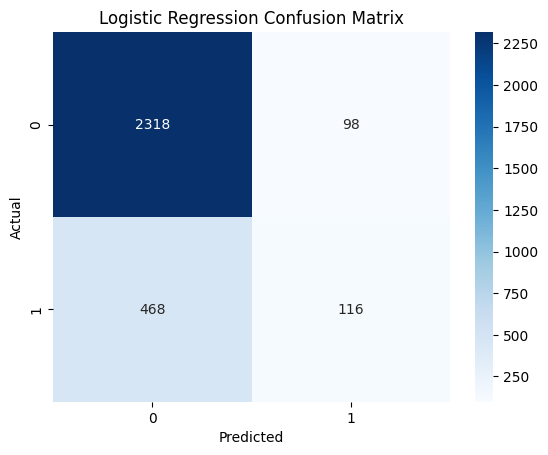


Random Forest:
              precision    recall  f1-score   support

           0       0.88      0.96      0.92      2416
           1       0.76      0.47      0.58       584

    accuracy                           0.87      3000
   macro avg       0.82      0.72      0.75      3000
weighted avg       0.86      0.87      0.85      3000

Accuracy: 0.8673333333333333


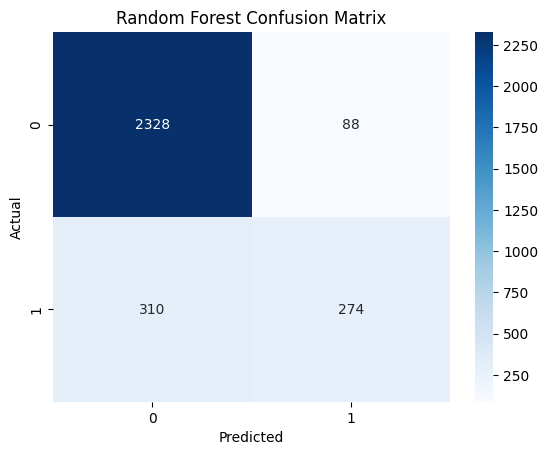


Gradient Boosting:
              precision    recall  f1-score   support

           0       0.89      0.96      0.92      2416
           1       0.77      0.48      0.59       584

    accuracy                           0.87      3000
   macro avg       0.83      0.72      0.76      3000
weighted avg       0.86      0.87      0.86      3000

Accuracy: 0.871


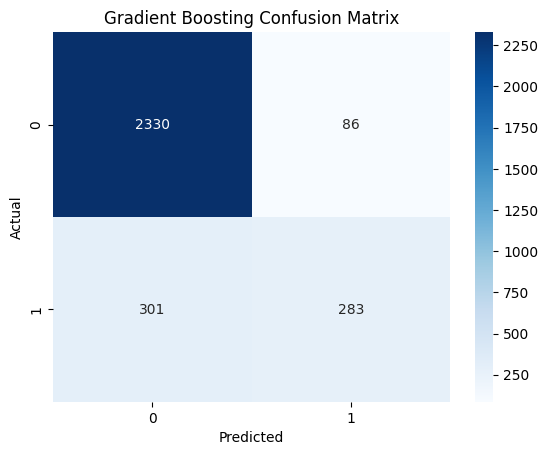

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('Churn_Modelling.csv')

# Preprocessing
df.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1, inplace=True)
df.fillna(method='ffill', inplace=True)
df = pd.get_dummies(df, columns=['Geography', 'Gender'], drop_first=True)

X = df.drop('Exited', axis=1)
y = df['Exited']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# models
logisticreg = LogisticRegression(max_iter=1000)
Rforest = RandomForestClassifier(random_state=42)
GBoosting = GradientBoostingClassifier(random_state=42)

# Logistic Regression
logisticreg.fit(X_train, y_train)
y_pred_logreg = logisticreg.predict(X_test)
print("Logistic Regression:")
print(classification_report(y_test, y_pred_logreg))
print("Accuracy:", accuracy_score(y_test, y_pred_logreg))
cm_logreg = confusion_matrix(y_test, y_pred_logreg)
sns.heatmap(cm_logreg, annot=True, fmt='d', cmap='Blues')
plt.title('Logistic Regression Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Random Forest
Rforest.fit(X_train, y_train)
y_pred_forest = Rforest.predict(X_test)
print("\nRandom Forest:")
print(classification_report(y_test, y_pred_forest))
print("Accuracy:", accuracy_score(y_test, y_pred_forest))
cm_forest = confusion_matrix(y_test, y_pred_forest)
sns.heatmap(cm_forest, annot=True, fmt='d', cmap='Blues')
plt.title('Random Forest Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Gradient Boosting
GBoosting.fit(X_train, y_train)
y_pred_gbc = GBoosting.predict(X_test)
print("\nGradient Boosting:")
print(classification_report(y_test, y_pred_gbc))
print("Accuracy:", accuracy_score(y_test, y_pred_gbc))
cm_gbc = confusion_matrix(y_test, y_pred_gbc)
sns.heatmap(cm_gbc, annot=True, fmt='d', cmap='Blues')
plt.title('Gradient Boosting Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()
